# 预测数值型数据：回归

## 用线性回归找到最佳拟合直线

### 线性回归
1. 优点：结果易于理解，计算上不复杂
2. 缺点：对非线性的数据拟合不好
3. 适用数据类型：数值型和标称型数据

### 回归的一般方法
1. 收集数据：采用任意方法收集数据
2. 准备数据：回归需要数值型数据，标称型数据将被转成二值型数据
3. 分析数据：绘出数据的可视化二维图将有助于对数据作出理解和分析，在采用缩减法求的新回归系数之后，可以将新拟合线绘在图上作对比
4. 训练算法：找到回归系数
5. 测试算法：使用R平方或者预测值和数据的拟合度，来分析模型的效果
6. 使用算法：使用回归，可以在给定输入的时候预测一个数值，这是对分类方法的提升，因为这样可以预测连续性数据而不仅仅是离散的类别标签

In [1]:
## 标准回归函数和数据导入函数
from numpy import *
def loadDataSet(fileName):
    numFeat = len(open(fileName).readline().split('\t'))-1
    dataMat = []
    labelMat = []
    fr = open(fileName)
    for line in fr.readlines():
        lineArr = []
        curLine = line.strip().split('\t')
        for i in range(numFeat):
            lineArr.append(float(curLine[i]))
        dataMat.append(lineArr)
        labelMat.append(float(curLine[-1]))
    return dataMat,labelMat

In [2]:
def standRegress(xArr,yArr):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    xTx = xMat.T*xMat
    # print(xTx)
    # Numpy提供一个线性代数的库linalg
    # linalg.det()用来计算行列式，非零则返回w
    if linalg.det(xTx) == 0:
        print("this matrix is singular,can not do inverse")
    ws = xTx.I * (xMat.T * yMat)
    return ws

In [3]:
from numpy import *
xArr,yArr = loadDataSet('ex0.txt')
# print(xArr)
# 第一个值总为1,我们假定偏移量为一个常数
xArr[0:2]

[[1.0, 0.067732], [1.0, 0.42781]]

In [4]:
ws = standRegress(xArr,yArr)
ws

matrix([[3.00774324],
        [1.69532264]])

In [5]:
## 用ws计算y的估计值yhat
xMat = mat(xArr)
# print(xMat)
yMat = mat(yArr)
print(yMat.T)
yHat = xMat * ws
# yHat

[[3.176513]
 [3.816464]
 [4.550095]
 [4.256571]
 [4.560815]
 [3.929515]
 [3.52617 ]
 [3.156393]
 [3.110301]
 [3.149813]
 [3.476346]
 [4.119688]
 [4.282233]
 [3.486582]
 [4.655492]
 [3.965162]
 [3.5149  ]
 [3.125947]
 [4.094115]
 [3.476039]
 [3.21061 ]
 [3.190612]
 [4.631504]
 [4.29589 ]
 [3.085028]
 [3.44808 ]
 [3.16744 ]
 [3.364266]
 [3.993482]
 [3.891471]
 [3.143259]
 [3.114204]
 [3.851484]
 [4.621899]
 [4.580768]
 [3.620992]
 [3.580501]
 [4.618706]
 [3.676867]
 [4.641845]
 [3.175939]
 [4.26498 ]
 [3.558448]
 [3.436632]
 [3.831052]
 [3.182853]
 [3.498906]
 [3.946833]
 [3.900583]
 [4.238522]
 [4.23308 ]
 [3.521557]
 [3.203344]
 [4.278105]
 [3.555705]
 [3.502661]
 [3.859776]
 [4.275956]
 [3.916191]
 [3.587961]
 [3.183004]
 [4.225236]
 [4.231083]
 [4.240544]
 [3.222372]
 [4.021445]
 [3.567479]
 [3.56258 ]
 [4.262059]
 [3.208813]
 [3.169825]
 [4.193949]
 [3.491678]
 [4.533306]
 [3.550108]
 [4.636427]
 [3.557078]
 [3.552874]
 [3.494159]
 [3.206828]
 [3.195266]
 [4.221292]
 [4.413372]
 [4.

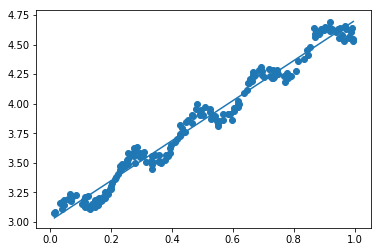

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
# a是个矩阵或者数组，a.flatten()就是把a降到一维，默认是按横的方向降
# 矩阵.A（等效于矩阵.getA()）变成了数组
ax.scatter(xMat[:,1].flatten().A[0],yMat.T[:,0].flatten().A[0])
## 上述命令创建了图像，并绘制了原始的数据。
## 为了保证直线上的数据点不出现次序混乱的情况，首先将点按升序排列
xCopy = xMat.copy()
# 对矩阵列进行排序
xCopy.sort(0)
# print(xCopy)
yHat = xCopy*ws
ax.plot(xCopy[:,1],yHat)
plt.show()

In [7]:
yHat = xMat * ws
# yHat和yMat的相关系数是0.98
corrcoef(yHat.T,yMat)

array([[1.        , 0.98647356],
       [0.98647356, 1.        ]])

## 局部加权线性回归
1. 优点：使得估计更加准确
2. 缺点：增加了计算量，对每个点进行预测时都必须使用整个数据集

In [9]:
## 局部加权线性回归函数
def lwlr(testPoint,xArr,yArr,k=1.0):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    # 得到数据集的数量
    m = shape(xMat)[0]
    # 初始化权重矩阵为单位矩阵
    weights = mat(eye((m)))
    for j in range(m):
        diffMat = testPoint - xMat[j,:]
        weights[j,j] = exp(diffMat*diffMat.T/(-2.0*k**2))
    xTx = xMat.T * (weights * xMat)
    if linalg.det(xTx) == 0.0:
        print("this matrix is singular,cannot do inverse")
        return
    ws = xTx.I * (xMat.T * (weights * yMat))
    return testPoint * ws

In [19]:
# 用于数据集中每个点调用lwlr()，这有助于求解k的大小
def lwlrTest(testArr,xArr,yArr,k=1.0):
    m = shape(testArr)[0]
    yHat = zeros(m)
    for i in range(m):
        yHat[i] = lwlr(testArr[i],xArr,yArr,k)
    return yHat

In [20]:
xArr,yArr = loadDataSet('ex0.txt')
print(yArr[0])
# 单点估计
print(lwlr(xArr[0],xArr,yArr,1.0))
print(lwlr(xArr[0],xArr,yArr,0.001))

3.176513
[[3.12204471]]
[[3.20175729]]


In [21]:
yHat = lwlrTest(xArr,xArr,yArr,0.03)
yHat

array([3.18386967, 3.74481738, 4.57182357, 4.2475426 , 4.58234143,
       3.89846698, 3.58339485, 3.13461927, 3.16862409, 3.17054833,
       3.48471451, 4.13554414, 4.24901891, 3.448602  , 4.59044108,
       3.97932601, 3.54444651, 3.17786548, 4.09362668, 3.42525662,
       3.18462133, 3.18364486, 4.61797431, 4.25078721, 3.08978089,
       3.53027417, 3.14910955, 3.35758187, 4.01240047, 3.89065994,
       3.15868699, 3.16819339, 3.89111528, 4.61107564, 4.59876338,
       3.53874856, 3.62704104, 4.55604386, 3.67968223, 4.61659231,
       3.20866185, 4.1938006 , 3.52385864, 3.42835988, 3.88993256,
       3.16295739, 3.55553237, 3.90396584, 3.90305749, 4.28763102,
       4.25232255, 3.49631661, 3.24860941, 4.32992666, 3.53037202,
       3.53029226, 3.82674901, 4.24446116, 3.93564708, 3.54093669,
       3.17841566, 4.24839064, 4.25053481, 4.19911139, 3.16835744,
       4.01631865, 3.58892016, 3.60109813, 4.26037351, 3.1705805 ,
       3.17079725, 4.18931526, 3.50444751, 4.57318553, 3.54499

In [22]:
## 绘图函数需要将数据点按序排列
xMat = mat(xArr)
# argsort(数字)，0为按列索引升序，1为按行索引升序
# print(shape(xMat[:,1]))
# print(shape(xMat[:,1].flatten()))
srtInd = xMat[:,1].argsort(0)
xSort = xMat[srtInd][:,0,:]

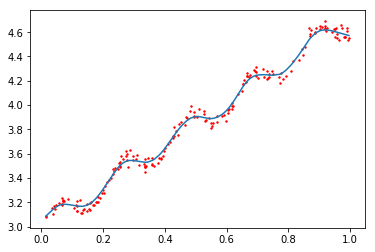

In [23]:
## 用matplotlib绘图
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(xSort[:,1],yHat[srtInd])
# flatten()函数将数组和矩阵平铺成1行
ax.scatter(xMat[:,1].flatten().A[0],mat(yArr).T.flatten().A[0],s=2,c='red')
plt.show()

## 示例：预测鲍鱼的年龄

In [24]:
## 计算误差
def rssError(yArr,yHatArr):
    return ((yArr-yHatArr)**2).sum()

In [25]:
abX,abY = loadDataSet('abalone.txt')
yHat01 = lwlrTest(abX[0:99],abX[0:99],abY[0:99],0.1)
yHat1 = lwlrTest(abX[0:99],abX[0:99],abY[0:99],1)
yHat10 = lwlrTest(abX[0:99],abX[0:99],abY[0:99],10)

In [26]:
print(rssError(abY[0:99],yHat01.T))
print(rssError(abY[0:99],yHat1.T))
print(rssError(abY[0:99],yHat10.T))

56.8252356890846
429.8905618700875
549.1181708825841


> 根据上面的数据可以看出，较小的核可以得到较低的误差，但是使用最小的核将会造成过拟合，不一定能达到最好的预测效果

In [27]:
yHat01 = lwlrTest(abX[100:199],abX[0:99],abY[0:99],0.1)
yHat1 = lwlrTest(abX[100:199],abX[0:99],abY[0:99],1)
yHat10 = lwlrTest(abX[100:199],abX[0:99],abY[0:99],10)

In [28]:
print(rssError(abY[100:199],yHat01.T))
print(rssError(abY[100:199],yHat1.T))
print(rssError(abY[100:199],yHat10.T))

19287.90284670521
573.5261441893879
517.5711905386539


In [29]:
## 接下来与简单的线性回归作比较
ws = standRegress(abX[0:99],abY[0:99])
yHat = mat(abX[100:199])*ws
rssError(abY[100:199],yHat.T.A)

518.6363153243936

## 缩减系数来“理解”数据

### 岭回归

In [30]:
## 岭回归
# 这个函数用于计算回归系数
def ridgeRegres(xMat,yMat,lam=0.2):
    xTx = xMat.T * xMat
    denom = xTx + eye(shape(xMat)[1])*lam
    if linalg.det(denom) == 0:
        print("this matrix is singular,cannot do inverse")
        return 
    ws = denom.I * (xMat.T * yMat)
    return ws

def ridgeTest(xArr,yArr):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    # mean(a,axis) axis=0,压缩行，对各列求均值，返回 1* n 矩阵
    # axis=1,压缩列，对各行求均值，返回 m *1 矩阵
    yMean = mean(yMat,0)
    yMat = yMat - yMean
    xMeans = mean(xMat,0)
    xVar = var(xMat,0)
    # 对应元素相除，将数据标准化
    xMat = (xMat - xMeans) / xVar
    numTestPts = 30
    wMat = zeros((numTestPts,shape(xMat)[1]))
    for i in range(numTestPts):
        # 这里的lamda以指数变化，可以看出lambda在取非常小和取非常大的值分别对结果造成的影响
        ws = ridgeRegres(xMat,yMat,exp(i-10))
        wMat[i,:] = ws.T
    return wMat
    

In [32]:
abX,abY = loadDataSet('abalone.txt')
# print(abX)
ridgeWeights = ridgeTest(abX,abY)
print(ridgeWeights)

[[ 4.30441949e-02 -2.27416346e-02  1.32140875e-01  2.07518171e-02
   2.22403745e+00 -9.98952980e-01 -1.17254237e-01  1.66229222e-01]
 [ 4.30441928e-02 -2.27416370e-02  1.32140878e-01  2.07518175e-02
   2.22403626e+00 -9.98952746e-01 -1.17254174e-01  1.66229339e-01]
 [ 4.30441874e-02 -2.27416435e-02  1.32140885e-01  2.07518187e-02
   2.22403305e+00 -9.98952110e-01 -1.17254003e-01  1.66229656e-01]
 [ 4.30441725e-02 -2.27416613e-02  1.32140904e-01  2.07518218e-02
   2.22402431e+00 -9.98950381e-01 -1.17253537e-01  1.66230518e-01]
 [ 4.30441321e-02 -2.27417096e-02  1.32140956e-01  2.07518304e-02
   2.22400054e+00 -9.98945682e-01 -1.17252271e-01  1.66232862e-01]
 [ 4.30440221e-02 -2.27418409e-02  1.32141096e-01  2.07518537e-02
   2.22393595e+00 -9.98932910e-01 -1.17248829e-01  1.66239232e-01]
 [ 4.30437233e-02 -2.27421979e-02  1.32141478e-01  2.07519172e-02
   2.22376039e+00 -9.98898194e-01 -1.17239474e-01  1.66256548e-01]
 [ 4.30429113e-02 -2.27431678e-02  1.32142515e-01  2.07520895e-02
   

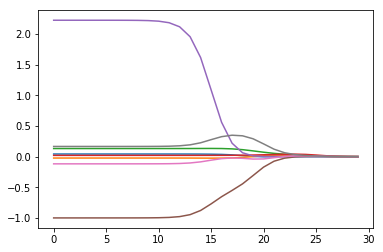

In [33]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(ridgeWeights)

## 前向逐步回归
它属于一种贪心算法，即每一步都尽可能减少误差

In [34]:
## 前向逐步线性回归
def regularize(xMat):
    inMat = xMat.copy()
    xMeans = mean(inMat,0)
    varMat = var(inMat,0)
    inMat = (inMat - xMeans) / varMat
    return inMat
    

def stageWise(xArr,yArr,eps=0.01,numIt=100):
    xMat = mat(xArr)
    yMat = mat(yArr).T
    # 数据标准化
    yMean = mean(yMat,0)
    yMat = yMat - yMean
    xMat = regularize(xMat)
    m,n = shape(xMat)
    returnMat = zeros((numIt,n))
    ws = zeros((n,1))
    wsTest = ws.copy()
    wsMax = ws.copy()
    for i in range(numIt):
        print(ws.T)
        lowestError = inf
        for j in range(n):
            # 分别计算增加或减少该特征对误差的影响
            for sign in [-1,1]:
                wsTest = ws.copy()
                wsTest[j] += eps * sign
                yTest = xMat * wsTest
                rssE = rssError(yMat.A,yTest.A)
                if rssE < lowestError:
                    lowestError = rssE
                    wsMax = wsTest
        ws = wsMax.copy()
        returnMat[i,:] = ws.T
    return returnMat

In [35]:
xArr,yArr = loadDataSet('abalone.txt')
stageWise(xArr,yArr,0.01,200)

[[0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.   0.   0.   0.01 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.02 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.03 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.04 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.05 0.   0.   0.   0.  ]]
[[0.   0.   0.   0.06 0.   0.   0.   0.  ]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.  ]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.01]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.02]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.03]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.04]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.05]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.06]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.07]]
[[0.   0.   0.01 0.06 0.   0.   0.   0.08]]
[[0.   0.   0.01 0.05 0.   0.   0.   0.08]]
[[0.   0.   0.01 0.05 0.   0.   0.   0.09]]
[[0.   0.   0.01 0.05 0.   0.   0.   0.1 ]]
[[0.   0.   0.01 0.05 0.   0.   0.   0.11]]
[[ 0.    0.    0.01  0.05  0.   -0.01  0.    0.11]]
[[ 0.    0.    0.01  0.05  0.   -0.02  0.    0.11]]
[[ 0.    0.    0.01  0.05  0.   

[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.05  0.    0.09  0.03  0.31 -0.64  0.    0.36]]
[[ 0.04  0.    0.09  0.03  0.31 -0.64  0.    0.36]]


array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.04,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36],
       [ 0.05,  0.  ,  0.09, ..., -0.64,  0.  ,  0.36]])

> 从上述运行的结果可以看出，w1和w6都是0，这表明它们不对目标值造成任何影响，即这些特征很可能是不需要的

In [36]:
stageWise(xArr,yArr,0.001,5000)

[[0. 0. 0. 0. 0. 0. 0. 0.]]
[[0.    0.    0.    0.001 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.002 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.003 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.004 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.005 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.006 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.007 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.008 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.009 0.    0.    0.    0.   ]]
[[0.   0.   0.   0.01 0.   0.   0.   0.  ]]
[[0.    0.    0.    0.011 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.012 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.013 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.014 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.015 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.016 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.017 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.018 0.    0.    0.    0.   ]]
[[0.    0.    0.    0.019 0.    0.    0.    

[[0.    0.    0.005 0.054 0.    0.    0.    0.093]]
[[0.    0.    0.005 0.054 0.    0.    0.    0.094]]
[[0.    0.    0.005 0.053 0.    0.    0.    0.094]]
[[0.    0.    0.005 0.053 0.    0.    0.    0.095]]
[[0.    0.    0.005 0.053 0.    0.    0.    0.096]]
[[0.    0.    0.005 0.053 0.    0.    0.    0.097]]
[[0.    0.    0.005 0.053 0.    0.    0.    0.098]]
[[0.    0.    0.005 0.052 0.    0.    0.    0.098]]
[[0.    0.    0.005 0.052 0.    0.    0.    0.099]]
[[0.    0.    0.005 0.052 0.    0.    0.    0.1  ]]
[[0.    0.    0.005 0.052 0.    0.    0.    0.101]]
[[0.    0.    0.005 0.052 0.    0.    0.    0.102]]
[[0.    0.    0.005 0.051 0.    0.    0.    0.102]]
[[0.    0.    0.005 0.051 0.    0.    0.    0.103]]
[[0.    0.    0.005 0.051 0.    0.    0.    0.104]]
[[0.    0.    0.005 0.051 0.    0.    0.    0.105]]
[[0.    0.    0.005 0.05  0.    0.    0.    0.105]]
[[0.    0.    0.005 0.05  0.    0.    0.    0.106]]
[[0.    0.    0.005 0.05  0.    0.    0.    0.107]]
[[0.    0.  

[[ 0.     0.     0.005  0.044  0.    -0.083  0.     0.179]]
[[ 0.     0.     0.005  0.044  0.    -0.084  0.     0.179]]
[[ 0.     0.     0.005  0.044  0.    -0.084  0.     0.18 ]]
[[ 0.     0.     0.005  0.044  0.    -0.085  0.     0.18 ]]
[[ 0.     0.     0.005  0.044  0.    -0.086  0.     0.18 ]]
[[ 0.     0.     0.005  0.044  0.    -0.086  0.     0.181]]
[[ 0.     0.     0.005  0.044  0.    -0.087  0.     0.181]]
[[ 0.     0.     0.005  0.044  0.    -0.088  0.     0.181]]
[[ 0.     0.     0.005  0.044  0.    -0.088  0.     0.182]]
[[ 0.     0.     0.005  0.044  0.    -0.089  0.     0.182]]
[[ 0.     0.     0.005  0.044  0.    -0.089  0.     0.183]]
[[ 0.     0.     0.005  0.044  0.    -0.09   0.     0.183]]
[[ 0.     0.     0.005  0.044  0.    -0.091  0.     0.183]]
[[ 0.     0.     0.005  0.044  0.    -0.091  0.     0.184]]
[[ 0.     0.     0.005  0.044  0.    -0.092  0.     0.184]]
[[ 0.     0.     0.005  0.044  0.    -0.093  0.     0.184]]
[[ 0.     0.     0.005  0.044  0.    -0.

[[ 0.     0.     0.02   0.04   0.    -0.195  0.     0.238]]
[[ 0.     0.     0.02   0.04   0.    -0.195  0.     0.239]]
[[ 0.     0.     0.02   0.039  0.    -0.195  0.     0.239]]
[[ 0.     0.     0.021  0.039  0.    -0.195  0.     0.239]]
[[ 0.     0.     0.022  0.039  0.    -0.195  0.     0.239]]
[[ 0.     0.     0.022  0.039  0.    -0.196  0.     0.239]]
[[ 0.     0.     0.022  0.039  0.    -0.197  0.     0.239]]
[[ 0.     0.     0.022  0.039  0.    -0.197  0.     0.24 ]]
[[ 0.     0.     0.022  0.039  0.    -0.198  0.     0.24 ]]
[[ 0.     0.     0.022  0.039  0.    -0.199  0.     0.24 ]]
[[ 0.     0.     0.022  0.039  0.    -0.199  0.     0.241]]
[[ 0.     0.     0.022  0.039  0.    -0.2    0.     0.241]]
[[ 0.     0.     0.022  0.039  0.    -0.2    0.     0.242]]
[[ 0.     0.     0.022  0.039  0.    -0.201  0.     0.242]]
[[ 0.     0.     0.022  0.039  0.    -0.202  0.     0.242]]
[[ 0.     0.     0.023  0.039  0.    -0.202  0.     0.242]]
[[ 0.     0.     0.023  0.039  0.    -0.

[[ 0.     0.     0.046  0.035  0.    -0.292  0.     0.277]]
[[ 0.     0.     0.046  0.035  0.    -0.293  0.     0.277]]
[[ 0.     0.     0.046  0.035  0.    -0.293  0.     0.278]]
[[ 0.     0.     0.046  0.035  0.    -0.294  0.     0.278]]
[[ 0.     0.     0.046  0.035  0.    -0.295  0.     0.278]]
[[ 0.     0.     0.046  0.035  0.    -0.295  0.     0.279]]
[[ 0.     0.     0.046  0.035  0.    -0.296  0.     0.279]]
[[ 0.     0.     0.046  0.035  0.    -0.296  0.     0.28 ]]
[[ 0.     0.     0.046  0.035  0.    -0.297  0.     0.28 ]]
[[ 0.     0.     0.046  0.035  0.    -0.298  0.     0.28 ]]
[[ 0.     0.     0.047  0.035  0.    -0.298  0.     0.28 ]]
[[ 0.     0.     0.047  0.035  0.    -0.299  0.     0.28 ]]
[[ 0.     0.     0.047  0.035  0.    -0.3    0.     0.28 ]]
[[ 0.     0.     0.047  0.035  0.    -0.3    0.     0.281]]
[[ 0.     0.     0.047  0.035  0.    -0.301  0.     0.281]]
[[ 0.     0.     0.047  0.035  0.    -0.302  0.     0.281]]
[[ 0.     0.     0.048  0.035  0.    -0.

[[ 0.     0.     0.073  0.03   0.    -0.403  0.     0.322]]
[[ 0.     0.     0.074  0.03   0.    -0.403  0.     0.322]]
[[ 0.     0.     0.074  0.03   0.    -0.404  0.     0.322]]
[[ 0.     0.     0.074  0.03   0.    -0.405  0.     0.322]]
[[ 0.     0.     0.074  0.03   0.    -0.405  0.     0.323]]
[[ 0.     0.     0.074  0.03   0.    -0.406  0.     0.323]]
[[ 0.     0.     0.074  0.03   0.    -0.406  0.     0.324]]
[[ 0.     0.     0.074  0.03   0.    -0.407  0.     0.324]]
[[ 0.     0.     0.074  0.03   0.    -0.408  0.     0.324]]
[[ 0.     0.     0.075  0.03   0.    -0.408  0.     0.324]]
[[ 0.     0.     0.075  0.03   0.    -0.409  0.     0.324]]
[[ 0.     0.     0.075  0.03   0.    -0.41   0.     0.324]]
[[ 0.     0.     0.075  0.03   0.    -0.41   0.     0.325]]
[[ 0.     0.     0.075  0.03   0.    -0.411  0.     0.325]]
[[ 0.     0.     0.075  0.03   0.    -0.412  0.     0.325]]
[[ 0.     0.     0.076  0.03   0.    -0.412  0.     0.325]]
[[ 0.     0.     0.076  0.029  0.    -0.

[[ 0.     0.     0.099  0.025  0.    -0.5    0.     0.362]]
[[ 0.     0.     0.099  0.025  0.    -0.501  0.     0.362]]
[[ 0.     0.     0.099  0.025  0.    -0.502  0.     0.362]]
[[ 0.     0.     0.1    0.025  0.    -0.502  0.     0.362]]
[[ 0.     0.     0.1    0.025  0.    -0.503  0.     0.362]]
[[ 0.     0.     0.1    0.025  0.    -0.504  0.     0.362]]
[[ 0.     0.     0.1    0.025  0.    -0.504  0.     0.363]]
[[ 0.     0.     0.1    0.025  0.    -0.505  0.     0.363]]
[[ 0.     0.     0.1    0.025  0.    -0.506  0.     0.363]]
[[ 0.     0.     0.101  0.025  0.    -0.506  0.     0.363]]
[[ 0.     0.     0.101  0.025  0.    -0.507  0.     0.363]]
[[ 0.     0.     0.101  0.025  0.    -0.508  0.     0.363]]
[[ 0.     0.     0.101  0.025  0.    -0.508  0.     0.364]]
[[ 0.     0.     0.101  0.025  0.    -0.509  0.     0.364]]
[[ 0.     0.     0.101  0.025  0.    -0.509  0.     0.365]]
[[ 0.     0.     0.101  0.025  0.    -0.51   0.     0.365]]
[[ 0.     0.     0.101  0.025  0.    -0.

[[ 0.     0.     0.109  0.023  0.056 -0.559  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.057 -0.559  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.058 -0.559  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.058 -0.56   0.     0.374]]
[[ 0.     0.     0.109  0.023  0.059 -0.56   0.     0.374]]
[[ 0.     0.     0.109  0.023  0.06  -0.56   0.     0.374]]
[[ 0.     0.     0.109  0.023  0.06  -0.561  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.061 -0.561  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.062 -0.561  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.062 -0.562  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.063 -0.562  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.064 -0.562  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.064 -0.563  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.065 -0.563  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.066 -0.563  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.067 -0.563  0.     0.374]]
[[ 0.     0.     0.109  0.023  0.067 -0.

[[ 0.005  0.     0.11   0.022  0.172 -0.595 -0.007  0.374]]
[[ 0.005  0.     0.11   0.022  0.173 -0.595 -0.007  0.374]]
[[ 0.005  0.     0.11   0.022  0.173 -0.596 -0.007  0.374]]
[[ 0.005  0.     0.11   0.022  0.174 -0.596 -0.007  0.374]]
[[ 0.005  0.     0.11   0.022  0.175 -0.596 -0.007  0.374]]
[[ 0.005  0.     0.11   0.022  0.176 -0.596 -0.007  0.374]]
[[ 0.005  0.     0.11   0.022  0.176 -0.596 -0.008  0.374]]
[[ 0.005  0.     0.11   0.022  0.177 -0.596 -0.008  0.374]]
[[ 0.005  0.     0.11   0.022  0.178 -0.596 -0.008  0.374]]
[[ 0.005  0.     0.11   0.022  0.179 -0.596 -0.008  0.374]]
[[ 0.005  0.     0.11   0.022  0.18  -0.596 -0.008  0.374]]
[[ 0.005  0.     0.11   0.022  0.18  -0.596 -0.009  0.374]]
[[ 0.005  0.     0.11   0.022  0.181 -0.596 -0.009  0.374]]
[[ 0.005  0.     0.11   0.022  0.182 -0.596 -0.009  0.374]]
[[ 0.005  0.     0.11   0.022  0.183 -0.596 -0.009  0.374]]
[[ 0.005  0.     0.11   0.022  0.184 -0.596 -0.009  0.374]]
[[ 0.005  0.     0.11   0.022  0.184 -0.

[[ 0.007  0.     0.11   0.022  0.291 -0.618 -0.014  0.363]]
[[ 0.007  0.     0.11   0.022  0.291 -0.618 -0.014  0.362]]
[[ 0.007  0.     0.11   0.022  0.292 -0.618 -0.014  0.362]]
[[ 0.007  0.     0.11   0.022  0.293 -0.618 -0.014  0.362]]
[[ 0.007  0.     0.11   0.022  0.294 -0.618 -0.014  0.362]]
[[ 0.007  0.     0.11   0.022  0.294 -0.619 -0.014  0.362]]
[[ 0.007  0.     0.11   0.022  0.295 -0.619 -0.014  0.362]]
[[ 0.007  0.     0.11   0.022  0.296 -0.619 -0.014  0.362]]
[[ 0.007  0.     0.11   0.022  0.296 -0.62  -0.014  0.362]]
[[ 0.007  0.     0.11   0.022  0.297 -0.62  -0.014  0.362]]
[[ 0.007  0.     0.11   0.022  0.298 -0.62  -0.014  0.362]]
[[ 0.008  0.     0.11   0.022  0.298 -0.62  -0.014  0.362]]
[[ 0.008  0.     0.11   0.022  0.298 -0.621 -0.014  0.362]]
[[ 0.008  0.     0.11   0.022  0.299 -0.621 -0.014  0.362]]
[[ 0.008  0.     0.11   0.022  0.3   -0.621 -0.014  0.362]]
[[ 0.008  0.     0.11   0.022  0.301 -0.621 -0.014  0.362]]
[[ 0.008  0.     0.11   0.022  0.301 -0.

[[ 0.01   0.     0.11   0.022  0.395 -0.638 -0.02   0.352]]
[[ 0.01   0.     0.11   0.022  0.396 -0.638 -0.02   0.352]]
[[ 0.01   0.     0.11   0.022  0.397 -0.638 -0.02   0.352]]
[[ 0.01   0.     0.11   0.022  0.397 -0.639 -0.02   0.352]]
[[ 0.01   0.     0.11   0.022  0.398 -0.639 -0.02   0.352]]
[[ 0.01   0.     0.11   0.022  0.399 -0.639 -0.02   0.352]]
[[ 0.01   0.     0.11   0.022  0.399 -0.64  -0.02   0.352]]
[[ 0.01   0.     0.11   0.022  0.4   -0.64  -0.02   0.352]]
[[ 0.01   0.     0.11   0.022  0.401 -0.64  -0.02   0.352]]
[[ 0.01   0.     0.11   0.022  0.402 -0.64  -0.02   0.352]]
[[ 0.01   0.     0.11   0.022  0.402 -0.64  -0.02   0.351]]
[[ 0.01   0.     0.11   0.022  0.403 -0.64  -0.02   0.351]]
[[ 0.01   0.     0.11   0.022  0.404 -0.64  -0.02   0.351]]
[[ 0.01   0.     0.11   0.022  0.405 -0.64  -0.02   0.351]]
[[ 0.01   0.     0.11   0.022  0.405 -0.641 -0.02   0.351]]
[[ 0.01   0.     0.11   0.022  0.406 -0.641 -0.02   0.351]]
[[ 0.01   0.     0.11   0.022  0.407 -0.

[[ 0.012  0.     0.11   0.022  0.523 -0.664 -0.026  0.339]]
[[ 0.012  0.     0.11   0.022  0.523 -0.665 -0.026  0.339]]
[[ 0.012  0.     0.11   0.022  0.524 -0.665 -0.026  0.339]]
[[ 0.012  0.     0.11   0.022  0.525 -0.665 -0.026  0.339]]
[[ 0.012  0.     0.11   0.022  0.526 -0.665 -0.026  0.339]]
[[ 0.012  0.     0.11   0.022  0.526 -0.665 -0.027  0.339]]
[[ 0.012  0.     0.11   0.022  0.527 -0.665 -0.027  0.339]]
[[ 0.012  0.     0.11   0.022  0.528 -0.665 -0.027  0.339]]
[[ 0.012  0.     0.11   0.022  0.529 -0.665 -0.027  0.339]]
[[ 0.012  0.     0.11   0.022  0.53  -0.665 -0.027  0.339]]
[[ 0.012  0.     0.11   0.022  0.53  -0.666 -0.027  0.339]]
[[ 0.012  0.     0.11   0.022  0.531 -0.666 -0.027  0.339]]
[[ 0.012  0.     0.11   0.022  0.532 -0.666 -0.027  0.339]]
[[ 0.012  0.     0.11   0.022  0.532 -0.666 -0.027  0.338]]
[[ 0.012  0.     0.11   0.022  0.533 -0.666 -0.027  0.338]]
[[ 0.012  0.     0.11   0.022  0.534 -0.666 -0.027  0.338]]
[[ 0.012  0.     0.11   0.022  0.535 -0.

[[ 0.015  0.     0.11   0.022  0.654 -0.69  -0.033  0.326]]
[[ 0.015  0.     0.11   0.022  0.654 -0.691 -0.033  0.326]]
[[ 0.015  0.     0.11   0.022  0.655 -0.691 -0.033  0.326]]
[[ 0.015  0.     0.11   0.022  0.656 -0.691 -0.033  0.326]]
[[ 0.015  0.     0.11   0.022  0.656 -0.692 -0.033  0.326]]
[[ 0.015  0.     0.11   0.022  0.657 -0.692 -0.033  0.326]]
[[ 0.015  0.     0.11   0.022  0.658 -0.692 -0.033  0.326]]
[[ 0.015  0.     0.11   0.022  0.659 -0.692 -0.033  0.326]]
[[ 0.015  0.     0.11   0.022  0.659 -0.692 -0.034  0.326]]
[[ 0.015  0.     0.11   0.022  0.66  -0.692 -0.034  0.326]]
[[ 0.015  0.     0.11   0.022  0.661 -0.692 -0.034  0.326]]
[[ 0.015  0.     0.11   0.022  0.662 -0.692 -0.034  0.326]]
[[ 0.015  0.     0.11   0.022  0.663 -0.692 -0.034  0.326]]
[[ 0.015  0.     0.11   0.022  0.663 -0.692 -0.034  0.325]]
[[ 0.015  0.     0.11   0.022  0.664 -0.692 -0.034  0.325]]
[[ 0.015  0.     0.11   0.022  0.665 -0.692 -0.034  0.325]]
[[ 0.015  0.     0.11   0.022  0.666 -0.

[[ 0.017  0.     0.11   0.022  0.786 -0.716 -0.041  0.313]]
[[ 0.017  0.     0.11   0.022  0.787 -0.716 -0.041  0.313]]
[[ 0.017  0.     0.11   0.022  0.788 -0.716 -0.041  0.313]]
[[ 0.017  0.     0.11   0.022  0.789 -0.716 -0.041  0.313]]
[[ 0.017  0.     0.11   0.022  0.789 -0.717 -0.041  0.313]]
[[ 0.017  0.     0.11   0.022  0.79  -0.717 -0.041  0.313]]
[[ 0.017  0.     0.11   0.022  0.791 -0.717 -0.041  0.313]]
[[ 0.017  0.     0.11   0.022  0.791 -0.717 -0.041  0.312]]
[[ 0.017  0.     0.11   0.022  0.792 -0.717 -0.041  0.312]]
[[ 0.017  0.     0.11   0.022  0.793 -0.717 -0.041  0.312]]
[[ 0.017  0.     0.11   0.022  0.794 -0.717 -0.041  0.312]]
[[ 0.017  0.     0.11   0.022  0.795 -0.717 -0.041  0.312]]
[[ 0.017  0.     0.11   0.022  0.795 -0.718 -0.041  0.312]]
[[ 0.017  0.     0.11   0.022  0.796 -0.718 -0.041  0.312]]
[[ 0.017  0.     0.11   0.022  0.797 -0.718 -0.041  0.312]]
[[ 0.017  0.     0.11   0.022  0.797 -0.719 -0.041  0.312]]
[[ 0.017  0.     0.11   0.022  0.798 -0.

[[ 0.02   0.     0.11   0.022  0.898 -0.738 -0.046  0.301]]
[[ 0.02   0.     0.11   0.022  0.899 -0.738 -0.046  0.301]]
[[ 0.02   0.     0.11   0.022  0.899 -0.739 -0.046  0.301]]
[[ 0.02   0.     0.11   0.022  0.9   -0.739 -0.046  0.301]]
[[ 0.02   0.     0.11   0.022  0.901 -0.739 -0.046  0.301]]
[[ 0.02   0.     0.11   0.022  0.901 -0.74  -0.046  0.301]]
[[ 0.02   0.     0.11   0.022  0.902 -0.74  -0.046  0.301]]
[[ 0.02   0.     0.11   0.022  0.903 -0.74  -0.046  0.301]]
[[ 0.02   0.     0.11   0.022  0.903 -0.741 -0.046  0.301]]
[[ 0.02   0.     0.11   0.022  0.904 -0.741 -0.046  0.301]]
[[ 0.02   0.     0.11   0.022  0.905 -0.741 -0.046  0.301]]
[[ 0.02   0.     0.11   0.022  0.906 -0.741 -0.046  0.301]]
[[ 0.02   0.     0.11   0.022  0.906 -0.741 -0.047  0.301]]
[[ 0.02   0.     0.11   0.022  0.907 -0.741 -0.047  0.301]]
[[ 0.02   0.     0.11   0.022  0.908 -0.741 -0.047  0.301]]
[[ 0.02   0.     0.11   0.022  0.909 -0.741 -0.047  0.301]]
[[ 0.02   0.     0.11   0.022  0.91  -0.

[[ 0.022  0.     0.11   0.022  1.019 -0.763 -0.052  0.289]]
[[ 0.022  0.     0.11   0.022  1.02  -0.763 -0.052  0.289]]
[[ 0.022  0.     0.11   0.022  1.02  -0.763 -0.053  0.289]]
[[ 0.022  0.     0.11   0.022  1.021 -0.763 -0.053  0.289]]
[[ 0.022  0.     0.11   0.022  1.022 -0.763 -0.053  0.289]]
[[ 0.022  0.     0.11   0.022  1.023 -0.763 -0.053  0.289]]
[[ 0.022  0.     0.11   0.022  1.024 -0.763 -0.053  0.289]]
[[ 0.022  0.     0.11   0.022  1.024 -0.764 -0.053  0.289]]
[[ 0.022  0.     0.11   0.022  1.025 -0.764 -0.053  0.289]]
[[ 0.022  0.     0.11   0.022  1.026 -0.764 -0.053  0.289]]
[[ 0.022  0.     0.11   0.022  1.026 -0.765 -0.053  0.289]]
[[ 0.022  0.     0.11   0.022  1.027 -0.765 -0.053  0.289]]
[[ 0.022  0.     0.11   0.022  1.028 -0.765 -0.053  0.289]]
[[ 0.022  0.     0.11   0.022  1.028 -0.765 -0.053  0.288]]
[[ 0.022  0.     0.11   0.022  1.029 -0.765 -0.053  0.288]]
[[ 0.022  0.     0.11   0.022  1.03  -0.765 -0.053  0.288]]
[[ 0.022  0.     0.11   0.022  1.031 -0.

[[ 0.025  0.     0.11   0.022  1.133 -0.785 -0.059  0.278]]
[[ 0.025  0.     0.11   0.022  1.134 -0.785 -0.059  0.278]]
[[ 0.025  0.     0.11   0.022  1.135 -0.785 -0.059  0.278]]
[[ 0.025  0.     0.11   0.022  1.135 -0.786 -0.059  0.278]]
[[ 0.025  0.     0.11   0.022  1.136 -0.786 -0.059  0.278]]
[[ 0.025  0.     0.11   0.022  1.137 -0.786 -0.059  0.278]]
[[ 0.025  0.     0.11   0.022  1.137 -0.786 -0.059  0.277]]
[[ 0.025  0.     0.11   0.022  1.138 -0.786 -0.059  0.277]]
[[ 0.025  0.     0.11   0.022  1.139 -0.786 -0.059  0.277]]
[[ 0.025  0.     0.11   0.022  1.14  -0.786 -0.059  0.277]]
[[ 0.025  0.     0.11   0.022  1.14  -0.787 -0.059  0.277]]
[[ 0.025  0.     0.11   0.022  1.141 -0.787 -0.059  0.277]]
[[ 0.025  0.     0.11   0.022  1.142 -0.787 -0.059  0.277]]
[[ 0.025  0.     0.11   0.022  1.143 -0.787 -0.059  0.277]]
[[ 0.025  0.     0.11   0.022  1.143 -0.787 -0.06   0.277]]
[[ 0.025  0.     0.11   0.022  1.144 -0.787 -0.06   0.277]]
[[ 0.025  0.     0.11   0.022  1.145 -0.

[[ 0.027  0.     0.11   0.022  1.26  -0.811 -0.065  0.265]]
[[ 0.027  0.     0.11   0.022  1.261 -0.811 -0.065  0.265]]
[[ 0.027  0.     0.11   0.022  1.261 -0.812 -0.065  0.265]]
[[ 0.027  0.     0.11   0.022  1.262 -0.812 -0.065  0.265]]
[[ 0.027  0.     0.11   0.022  1.263 -0.812 -0.065  0.265]]
[[ 0.028  0.     0.11   0.022  1.263 -0.812 -0.065  0.265]]
[[ 0.028  0.     0.11   0.022  1.263 -0.813 -0.065  0.265]]
[[ 0.028  0.     0.11   0.022  1.264 -0.813 -0.065  0.265]]
[[ 0.028  0.     0.11   0.022  1.265 -0.813 -0.065  0.265]]
[[ 0.028  0.     0.11   0.022  1.266 -0.813 -0.065  0.265]]
[[ 0.028  0.     0.11   0.022  1.266 -0.813 -0.065  0.264]]
[[ 0.028  0.     0.11   0.022  1.267 -0.813 -0.065  0.264]]
[[ 0.028  0.     0.11   0.022  1.268 -0.813 -0.065  0.264]]
[[ 0.028  0.     0.11   0.022  1.269 -0.813 -0.065  0.264]]
[[ 0.028  0.     0.11   0.022  1.269 -0.813 -0.066  0.264]]
[[ 0.028  0.     0.11   0.022  1.27  -0.813 -0.066  0.264]]
[[ 0.028  0.     0.11   0.022  1.271 -0.

[[ 0.03   0.     0.11   0.022  1.364 -0.831 -0.071  0.255]]
[[ 0.03   0.     0.11   0.022  1.364 -0.832 -0.071  0.255]]
[[ 0.03   0.     0.11   0.022  1.365 -0.832 -0.071  0.255]]
[[ 0.03   0.     0.11   0.022  1.366 -0.832 -0.071  0.255]]
[[ 0.03   0.     0.11   0.022  1.367 -0.832 -0.071  0.255]]
[[ 0.03   0.     0.11   0.022  1.367 -0.832 -0.071  0.254]]
[[ 0.03   0.     0.11   0.022  1.368 -0.832 -0.071  0.254]]
[[ 0.03   0.     0.11   0.022  1.369 -0.832 -0.071  0.254]]
[[ 0.03   0.     0.11   0.022  1.37  -0.832 -0.071  0.254]]
[[ 0.03   0.     0.11   0.022  1.37  -0.833 -0.071  0.254]]
[[ 0.03   0.     0.11   0.022  1.371 -0.833 -0.071  0.254]]
[[ 0.03   0.     0.11   0.022  1.372 -0.833 -0.071  0.254]]
[[ 0.03   0.     0.11   0.022  1.372 -0.834 -0.071  0.254]]
[[ 0.03   0.     0.11   0.022  1.373 -0.834 -0.071  0.254]]
[[ 0.03   0.     0.11   0.022  1.374 -0.834 -0.071  0.254]]
[[ 0.03   0.     0.11   0.022  1.374 -0.834 -0.071  0.253]]
[[ 0.03   0.     0.11   0.022  1.375 -0.

[[ 3.200e-02 -1.000e-03  1.110e-01  2.200e-02  1.492e+00 -8.570e-01
  -7.800e-02  2.420e-01]]
[[ 3.200e-02 -1.000e-03  1.110e-01  2.200e-02  1.493e+00 -8.570e-01
  -7.800e-02  2.420e-01]]
[[ 3.200e-02 -1.000e-03  1.110e-01  2.200e-02  1.494e+00 -8.570e-01
  -7.800e-02  2.420e-01]]
[[ 3.200e-02 -1.000e-03  1.110e-01  2.200e-02  1.494e+00 -8.570e-01
  -7.800e-02  2.410e-01]]
[[ 3.200e-02 -1.000e-03  1.110e-01  2.200e-02  1.495e+00 -8.570e-01
  -7.800e-02  2.410e-01]]
[[ 3.200e-02 -1.000e-03  1.110e-01  2.200e-02  1.496e+00 -8.570e-01
  -7.800e-02  2.410e-01]]
[[ 3.200e-02 -1.000e-03  1.110e-01  2.200e-02  1.497e+00 -8.570e-01
  -7.800e-02  2.410e-01]]
[[ 3.200e-02 -1.000e-03  1.110e-01  2.200e-02  1.497e+00 -8.580e-01
  -7.800e-02  2.410e-01]]
[[ 3.200e-02 -1.000e-03  1.110e-01  2.200e-02  1.498e+00 -8.580e-01
  -7.800e-02  2.410e-01]]
[[ 3.200e-02 -1.000e-03  1.110e-01  2.200e-02  1.499e+00 -8.580e-01
  -7.800e-02  2.410e-01]]
[[ 3.20e-02 -1.00e-03  1.11e-01  2.20e-02  1.50e+00 -8.58e-0

[[ 0.035 -0.003  0.113  0.022  1.62  -0.883 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.621 -0.883 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.622 -0.883 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.622 -0.884 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.623 -0.884 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.624 -0.884 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.624 -0.885 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.625 -0.885 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.626 -0.885 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.627 -0.885 -0.084  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.627 -0.885 -0.085  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.628 -0.885 -0.085  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.629 -0.885 -0.085  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.63  -0.885 -0.085  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.631 -0.885 -0.085  0.228]]
[[ 0.035 -0.003  0.113  0.022  1.631 -0.885 -0.085  0.227]]
[[ 0.035 -0.003  0.113  0.022  1.632 -0.

[[ 0.038 -0.004  0.114  0.022  1.732 -0.905 -0.09   0.217]]
[[ 0.038 -0.004  0.114  0.022  1.732 -0.906 -0.09   0.217]]
[[ 0.038 -0.004  0.114  0.022  1.733 -0.906 -0.09   0.217]]
[[ 0.038 -0.004  0.114  0.022  1.734 -0.906 -0.09   0.217]]
[[ 0.038 -0.004  0.114  0.022  1.735 -0.906 -0.09   0.217]]
[[ 0.038 -0.004  0.114  0.022  1.735 -0.906 -0.09   0.216]]
[[ 0.038 -0.004  0.114  0.022  1.736 -0.906 -0.09   0.216]]
[[ 0.038 -0.004  0.114  0.022  1.737 -0.906 -0.09   0.216]]
[[ 0.038 -0.004  0.114  0.022  1.738 -0.906 -0.09   0.216]]
[[ 0.038 -0.004  0.114  0.022  1.738 -0.906 -0.091  0.216]]
[[ 0.038 -0.004  0.115  0.022  1.738 -0.906 -0.091  0.216]]
[[ 0.038 -0.005  0.115  0.022  1.738 -0.906 -0.091  0.216]]
[[ 0.038 -0.005  0.115  0.022  1.739 -0.906 -0.091  0.216]]
[[ 0.038 -0.005  0.115  0.022  1.74  -0.906 -0.091  0.216]]
[[ 0.038 -0.005  0.115  0.022  1.741 -0.906 -0.091  0.216]]
[[ 0.038 -0.005  0.115  0.022  1.741 -0.907 -0.091  0.216]]
[[ 0.038 -0.005  0.115  0.022  1.742 -0.

[[ 0.04  -0.007  0.117  0.022  1.857 -0.93  -0.097  0.204]]
[[ 0.04  -0.007  0.117  0.022  1.858 -0.93  -0.097  0.204]]
[[ 0.04  -0.007  0.117  0.022  1.858 -0.931 -0.097  0.204]]
[[ 0.04  -0.007  0.117  0.022  1.859 -0.931 -0.097  0.204]]
[[ 0.04  -0.007  0.117  0.022  1.86  -0.931 -0.097  0.204]]
[[ 0.04  -0.007  0.117  0.022  1.861 -0.931 -0.097  0.204]]
[[ 0.04  -0.007  0.117  0.022  1.861 -0.931 -0.097  0.203]]
[[ 0.04  -0.007  0.117  0.022  1.862 -0.931 -0.097  0.203]]
[[ 0.04  -0.007  0.117  0.022  1.863 -0.931 -0.097  0.203]]
[[ 0.04  -0.007  0.117  0.022  1.864 -0.931 -0.097  0.203]]
[[ 0.04  -0.007  0.117  0.022  1.864 -0.932 -0.097  0.203]]
[[ 0.04  -0.007  0.117  0.022  1.865 -0.932 -0.097  0.203]]
[[ 0.04  -0.007  0.117  0.022  1.866 -0.932 -0.097  0.203]]
[[ 0.04  -0.007  0.117  0.022  1.866 -0.932 -0.097  0.202]]
[[ 0.04  -0.007  0.117  0.022  1.867 -0.932 -0.097  0.202]]
[[ 0.04  -0.007  0.117  0.022  1.868 -0.932 -0.097  0.202]]
[[ 0.04  -0.007  0.117  0.022  1.869 -0.

[[ 0.042 -0.008  0.118  0.022  1.986 -0.955 -0.104  0.19 ]]
[[ 0.042 -0.008  0.118  0.022  1.987 -0.955 -0.104  0.19 ]]
[[ 0.042 -0.008  0.118  0.022  1.988 -0.955 -0.104  0.19 ]]
[[ 0.042 -0.008  0.118  0.022  1.989 -0.955 -0.104  0.19 ]]
[[ 0.042 -0.008  0.118  0.022  1.989 -0.956 -0.104  0.19 ]]
[[ 0.042 -0.008  0.118  0.022  1.99  -0.956 -0.104  0.19 ]]
[[ 0.042 -0.008  0.118  0.022  1.991 -0.956 -0.104  0.19 ]]
[[ 0.043 -0.008  0.118  0.022  1.991 -0.956 -0.104  0.19 ]]
[[ 0.043 -0.008  0.118  0.022  1.992 -0.956 -0.104  0.19 ]]
[[ 0.043 -0.009  0.118  0.022  1.992 -0.956 -0.104  0.19 ]]
[[ 0.043 -0.009  0.119  0.022  1.992 -0.956 -0.104  0.19 ]]
[[ 0.043 -0.01   0.119  0.022  1.992 -0.956 -0.104  0.19 ]]
[[ 0.043 -0.01   0.119  0.022  1.993 -0.956 -0.104  0.19 ]]
[[ 0.043 -0.01   0.119  0.022  1.994 -0.956 -0.104  0.19 ]]
[[ 0.043 -0.01   0.119  0.022  1.995 -0.956 -0.104  0.19 ]]
[[ 0.043 -0.01   0.119  0.022  1.995 -0.956 -0.104  0.189]]
[[ 0.043 -0.01   0.119  0.022  1.996 -0.

[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.

[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.

[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.

[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.

[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.043 -0.011  0.12   0.022  2.023 -0.963 -0.105  0.187]]
[[ 0.044 -0.011  0.12   0.022  2.023 -0.

array([[ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   , ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.043, -0.011,  0.12 , ..., -0.963, -0.105,  0.187],
       [ 0.044, -0.011,  0.12 , ..., -0.963, -0.105,  0.187],
       [ 0.043, -0.011,  0.12 , ..., -0.963, -0.105,  0.187]])

In [37]:
## 将上述结果与最小二乘法进行比较
xMat = mat(xArr)
yMat = mat(yArr).T
xMat = regularize(xMat)
yMean = mean(yMat,0)
yMat = yMat - yMean
weights = standRegress(xMat,yMat.T)
weights.T

matrix([[ 0.0430442 , -0.02274163,  0.13214087,  0.02075182,  2.22403814,
         -0.99895312, -0.11725427,  0.16622915]])

## 示例：预测乐高玩具套装的价格

### 示例：用回归预测乐高套装的价格
1. 收集数据：用Google shopping 的 API 收集数据
2. 准备数据：从返回的JSON数据中抽取价格
3. 分析数据：可视化并观察数据
4. 训练算法：构建不同的模型，采用逐步线性回归和直接的线性回归模型
5. 使用算法：这次练习的目标就是生产数据模型

In [42]:
## Google shopping的API已经关闭
import json
from urllib.request import urlopen
myAPIstr = 'get from code.google.com'
searchURL = 'https://www.googleapis.com/shopping/search/v1/public/products?\
            key=%s&country=US&q=lego+%d&alt=json' % (myAPIstr,8288)
pg = urlopen(searchURL)
retDict = json.loads(pg.read())

HTTPError: HTTP Error 400: Bad Request

In [43]:
## 交叉验证测试岭回归
def crossValidation(xArr,yArr,numVal=10):
    '''
    numVal:交叉验证的次数
    '''
    m = len(yArr)
    indexList = range(m)
    errorMat = zeros((numVal,30))
    for i in range(numVal):
        trainX = []
        trainY = []
        testX = []
        testY = []
        random.shuffle(indexList)
        for j in range(m):
            # 构建训练集和测试集，数据集的90%分割为训练集，其余的为测试集
            if j < m * 0.9:
                trainX.append(xArr[indexList[j]])
                trainY.append(yArr[indexList[j]])
            else:
                testX.append(xArr[indexList[j]])
                testY.append(yArr[indexList[j]])
        wMat = ridgeTest(trainX,trainY)
        for k in range(30):
            matTestX = mat(testX)
            matTrainX = mat(trainX)
            meanTrain = mean(matTrainX,0)
            varTrain = var(matTrainX,0)
            matTestX = (matTeatX - meanTrain) / varTrain
            # 对每组回归系数计算测试集的预测值
            yEst = matTestX * mat(wMat[k,:].T) + mean(trainY)
            errorMat[i,k] = rssError(yEst.T.A,array(testY))
    meanErrors = mean(errorMat,0)
    minMean = float(min(meanErrors))
    bestWeights = wMat[nonzero(meanErrors==minMean)]
    xMat = mat(xArr)
    yMat = mat(yArr).T
    meanX = mean(xMat,0)
    varX = var(xMat,0)
    unReg = bestWeights / varX
    print("the best model from Ridge Regression is:\n",unReg)
    print("with constant term:",-1*sum(multiply(meanX,unReg)) + mean(yMat))
            